## Two crossed mirrors
An optical system of two mirrors which are `crossed`, in the sense that the instrumental polarization introduced by one mirror is eliminated by the other one. Three beams, first beam from the source to the first mirror, second beam from the first mirror to second mirror, and third beam from second mirror to the detector, are perpendicular to each other. Finally, the Mueller matrix is calculated to be an identity matrix, barring floating point errors.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
from PyAstroPol import *
roundOffDisplay(5)

In [2]:
S = Source(100, Clear=100)                                  # Source for ray analysis
Sd = Source(20, Clear=100)                                  # Source for ray analysis
S.Wavelength = 0.854
Sd.Wavelength = 0.854
#
M1 = Surface(200, Mirror=True, n2='Al')                     # First mirror
M1.rotateAboutX(45)                                         # Fold the mirror
M1.translateOrigin(z=1000)                                  # Move the mirror
#
M2 = Surface(200, Mirror=True, n2='Al')                     # Second mirror
M2.rotateAboutX(90)                                         # Rotate the mirror
M2.rotateAboutZ(45)                                         # Fold the mirror
M2.translateOrigin(y=1000, z=1000)                          # Move the mirror
#
D = Detector(150)                                           # Detector
D.rotateAboutY(90)                                          # Rotate the detector
D.translateOrigin(x=1000, y=1000, z=1000)                   # Move the detector
#
D2 = Detector(150)
D2.rotateAboutX(90)                                         # Rotate the detector
D2.translateOrigin(y=1000, z=1000)                          # Move the detector

In [3]:
Sys = System(S, [M1, M2], D, dRays=Sd)                      # Complete optical system
Sys.propagateRays()                                         # Propagate rays through system

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: invalid value encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: divide by zero encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: divide by zero encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: invalid value encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: divide by zero encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: divide by zero encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np

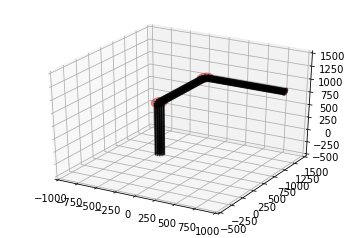

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                # Draw optical system
adjustAspect(Ax, 2000, y=500, z=500)                        # Adjust 3D space
plt.show()

In [5]:
MM, Tra = Sys.getSystemMuellerMatrix()                      # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000  0.00000 -0.00000  0.00000]
 [ 0.00000  1.00000 -0.00000  0.00000]
 [ 0.00000  0.00000  1.00000 -0.00000]
 [-0.00000 -0.00000 -0.00000  1.00000]]
Throughput is:  0.7264252944238789


C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: invalid value encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: divide by zero encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
